
# Лабораторная работа №6

## Методы обучения без учителя

##### Выполнил: Борисочкин М. И., РТ5-61Б


### Текстовое описание набора данных

Для изучения методов класстеризации и снижения размерности был выбран набор данных по классификации сорта вина по химическому составу. ([UCI Wine Dataset](https://www.kaggle.com/datasets/aarontanjaya/uci-wine-dataset-edit)).

В данном наборе данных присутствуют следующие столбцы:
- Cultivars — сорт вина (от 1 до 3). Является целевым признаком
- Alcohol — содержание алкоголя в вине;
- Malic acid — содержание яблочной кислоты в вине;
- Ash — содержание золы в вине;
- Ash Alcalinity — щёлочность золы;
- Magnesium — содержание магния в вине;
- Total Phenols — содержание фенолов в вине;
- Flavanoids — содержание флаваноидов в вине;
- Nonflavanoid Phenols — содержание нефлавоноидных фенолов в вине;
- Proanthocyanins — содержание проантоцианинов в вине;
- Color Intensity — интенсивность цвета вина;
- Hue — оттенок цвета вина;
- OD280/OD315 of diluted wines — концетрация белка в вине;
- Proline — содержание пролинов в вине.


### Импорт библиотек


In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import BisectingKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks')


### Загрузка данных


In [2]:
# Загрузка датасета
data : pd.DataFrame = pd.read_csv('data/wine.csv', index_col=0)
d1 = data.drop(columns=['Cultivars'])


### Разведочный анализ данных


In [3]:
# Первые пять строк датасета
d1.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Последние пять строк датасета
d1.tail()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
# Размер датасета
d1.shape

(178, 13)

In [6]:
# Типы столбцов
d1.dtypes

Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total Phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [7]:
# Пустые значения
d1.isnull().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total Phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [8]:
# Дублирующиеся значения
d1.duplicated().sum()

0

In [9]:
# Статистические характеристки датасета
d1.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


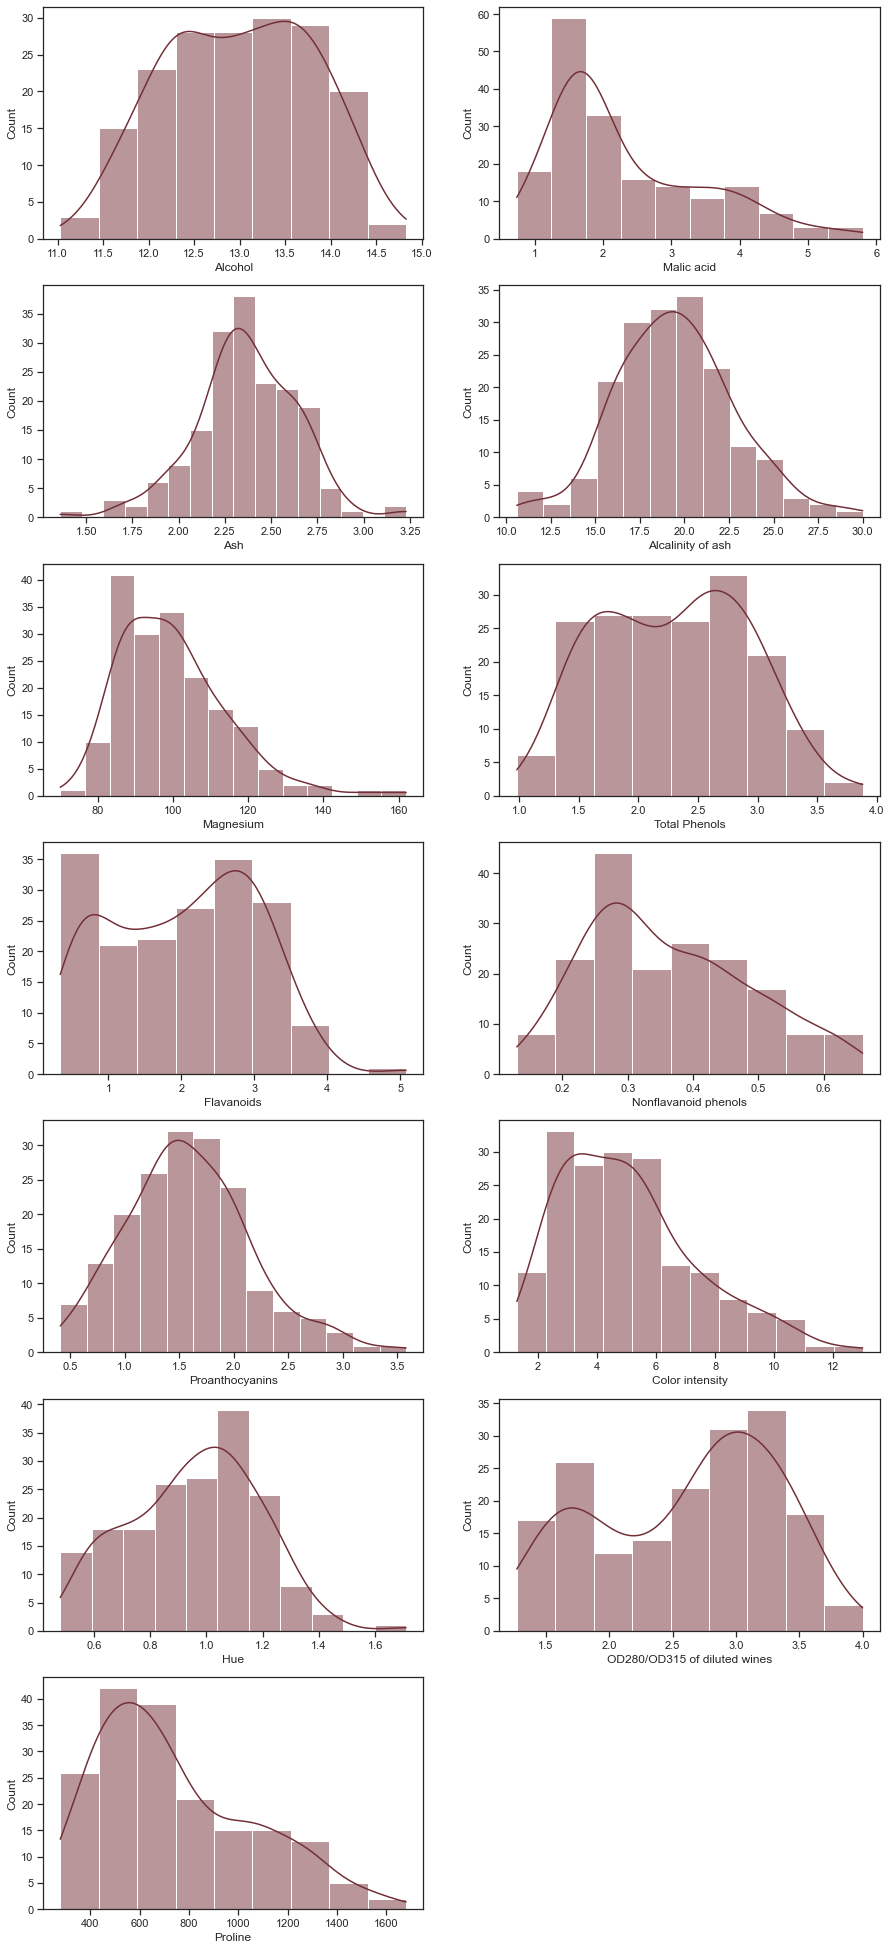

In [10]:
# Гистограммы столбцов
fig, ax = plt.subplots(7, 2, figsize=(15, 35))
for i, column in zip(np.arange(0, ax.size), d1.columns):
    sns.histplot(data=d1, x=column, color='#722F37', kde=True, ax=ax[int(i/2), i%2])
fig.delaxes(ax[6, 1])
plt.show()


### Масштабирование признаков


In [11]:
# Масштабирование данных
scaler = StandardScaler()

d1_scaled = pd.DataFrame(scaler.fit_transform(X=d1), columns=d1.columns)


### Снижение размерности



#### Метод главных компонент


In [12]:
# Снижение размерности
pca = PCA(n_components=2, random_state=4)

d2 = pd.DataFrame(data=pca.fit_transform(X=d1_scaled), columns=['PC1', 'PC2'])
d2.head()

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [13]:
# Доля объяснённой дисперсии
print('Доля объяснённой диспреси: {};\nСумма долей: {}.'
      .format(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()))


Доля объяснённой диспреси: [0.36198848 0.1920749 ];
Сумма долей: 0.5540633835693531.



#### Алгоритм t-SNE


In [14]:
# Снижение размерности
tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=4)

d3 = pd.DataFrame(data=tsne.fit_transform(X=d1_scaled), columns=['C1', 'C2'])
d3.head()

,C1,C2
0,12.552845,-3.305557
1,8.491179,-3.472567
2,10.285995,-7.511632
3,12.982765,-6.295717
4,6.148778,-8.266008



#### Визуализация новых датасетов


In [15]:
# Метки классов
class_labels = data['Cultivars']

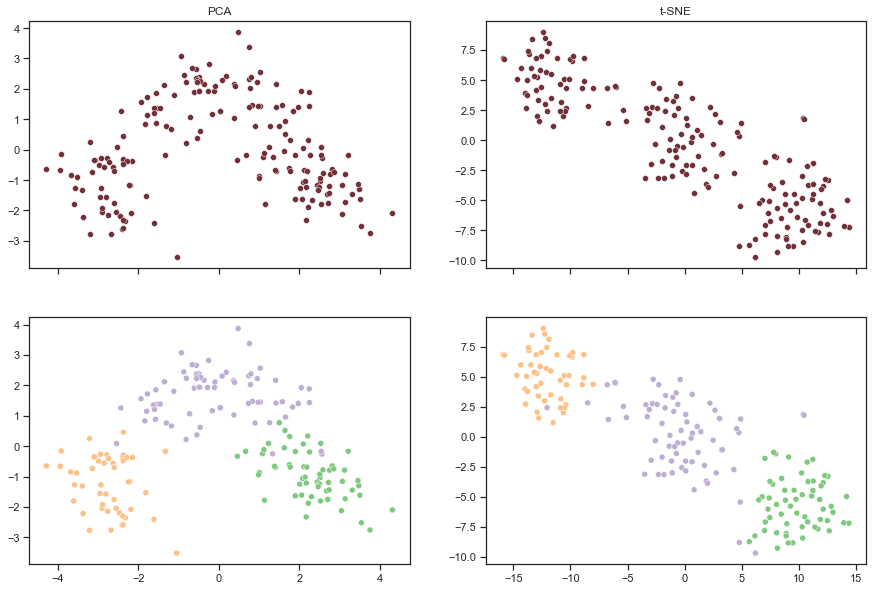

In [16]:
# Визуалиация датасетов
fig, ax = plt.subplots(2, 2, sharex='col', figsize=(15, 10))
sns.scatterplot(data=d2, x='PC1', y='PC2', color='#722F37', legend=False, ax=ax[0, 0])
sns.scatterplot(data=d3, x='C1', y='C2', color='#722F37', legend=False, ax=ax[0, 1])
sns.scatterplot(data=d2, x='PC1', y='PC2', hue=class_labels, palette='Accent', legend=False, ax=ax[1, 0])
sns.scatterplot(data=d3, x='C1', y='C2', hue=class_labels, palette='Accent', legend=False, ax=ax[1, 1])
ax[0, 0].set(xlabel=None, ylabel=None, title='PCA')
ax[0, 1].set(xlabel=None, ylabel=None, title='t-SNE')
ax[1, 0].set(xlabel=None, ylabel=None)
ax[1, 1].set(xlabel=None, ylabel=None)
plt.show()

В графике датасета D3 (t-SNE) кластеры выявлены более явно, чем в D2 (PCA). Но если учитывать метки классов, то ситуация становится обратной: класстеры более выражены у датасета D2.


### Кластеризация


In [17]:
# Списки датасетов, моделей и оценок
dataset_list = [d1_scaled, d2, d3]

method_list = []
d1_scores_list = []
d2_scores_list = []
d3_scores_list = []

In [18]:
def do_clustering(datasets, method):
    """
    Фунция кластеризации нескольких датасетов

    :param datasets: Датасеты
    :param method: Метод кластеризации
    :return: Список кластеров, центры кластеров
    """
    results = []
    for dataset in datasets:
        result = method.fit_predict(dataset)
        results.append(result)

    return results

In [19]:
def do_clustering_with_centers(datasets, method):
    """
    Фунция кластеризации нескольких датасетов с центрами кластеризации

    :param datasets: Датасеты
    :param method: Метод кластеризации
    :return: Список кластеров, центры кластеров
    """
    results = []
    centers = []
    for dataset in datasets:
        result = method.fit_predict(dataset)
        centers.append(method.cluster_centers_)
        results.append(result)

    return results, centers

In [20]:
def cluster_metrics(datasets, clusters, cluster_true):
    """
    Функция оценки качества кластеризации различных наборов данных

    :param datasets: Датасеты
    :param clusters: Кластеры
    :param cluster_true: Истинное значение класстеров
    :return: Таблицу с метриками для каждого датасета
    """

    datasets_names = ['D1', 'D2', 'D3']

    ari = []
    ami = []
    hl = []
    cl = []
    vl = []
    sl = []

    for cluster, dataset in zip(clusters, datasets):
        ari.append(adjusted_rand_score(cluster_true, cluster))
        ami.append(adjusted_mutual_info_score(cluster_true, cluster))

        h, c, v = homogeneity_completeness_v_measure(cluster_true, cluster)
        hl.append(h)
        cl.append(c)
        vl.append(v)

        try:
            sil_score = silhouette_score(dataset, cluster)
        except:
            sil_score =None
        sl.append(sil_score)

    result = pd.DataFrame({'Datasets':datasets_names,
                           'ARI':ari, 'AMI':ami,
                           'Homogeneity':hl,
                           'Completeness':cl,
                           'V-measure':vl, 'Silhouette':sl})
    return result

In [21]:
def plot_clusters(clusters):
    """
    Фунция визуализации кластеров

    :param clusters: Кластеры для визуализации
    """
    f, a = plt.subplots(1, 2, figsize=(15, 5))
    sns.scatterplot(data=d2, x='PC1', y='PC2', hue=clusters[0], palette='Accent', legend=False, ax=a[0])
    sns.scatterplot(data=d3, x='C1', y='C2', hue=clusters[1], palette='Accent', legend=False, ax=a[1])
    a[0].set(xlabel=None, ylabel=None, title='PCA')
    a[1].set(xlabel=None, ylabel=None, title='t-SNE')
    plt.show()

In [22]:
def plot_clusters_with_centers(clusters, clusters_centers):
    """
    Фунция визуализации кластеров

    :param clusters: Кластеры для визуализации
    :param clusters_centers: Центры кластеров
    """
    f, a = plt.subplots(1, 2, figsize=(15, 5))
    sns.scatterplot(data=d2, x='PC1', y='PC2', hue=clusters[0], palette='Accent', legend=False, ax=a[0])
    sns.scatterplot(data=clusters_centers[0], x=clusters_centers[0][:, 0], y=clusters_centers[0][:, 1],
                    ax=a[0], marker='x', s=128, color='black')
    sns.scatterplot(data=d3, x='C1', y='C2', hue=clusters[1], palette='Accent', legend=False, ax=a[1])
    sns.scatterplot(data=clusters_centers[1], x=clusters_centers[1][:, 0], y=clusters_centers[1][:, 1],
                    ax=a[1], marker='x', s=128, color='black')
    a[0].set(xlabel=None, ylabel=None, title='PCA')
    a[1].set(xlabel=None, ylabel=None, title='t-SNE')
    plt.show()


#### Метод K-средних


In [23]:
%%time
# Применение метода
k_means = KMeans(n_clusters=3, random_state=4)
type(k_means)
k_means_clusters, k_means_centers = do_clustering_with_centers(dataset_list, k_means)

CPU times: total: 15.6 ms
Wall time: 15.6 ms


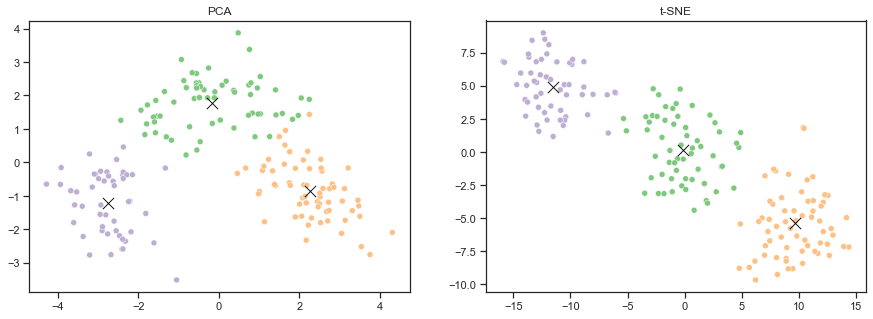

In [24]:
# Визуализация кластеров
plot_clusters_with_centers(k_means_clusters[1:], k_means_centers[1:])

In [25]:
# Оценка метода
cluster_metrics(dataset_list, k_means_clusters, class_labels)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,D1,0.897495,0.874579,0.878843,0.872964,0.875894,0.284859
1,D2,0.895058,0.880815,0.883981,0.880158,0.882065,0.561051
2,D3,0.802459,0.793332,0.799049,0.791971,0.795494,0.614013


In [26]:
def plot_inertia(dataset, method):
    """
    Функция для визуализации инерции
    :param dataset: Датасет
    :param method: Метод кластеризации
    """
    _, a = plt.subplots(figsize=(7, 5))
    inertia = []
    temp_x = dataset
    for k in range(1, 8):
        kmeans = method(n_clusters=k, random_state=4).fit(temp_x)
        inertia.append(kmeans.inertia_)
    sns.pointplot(x=np.arange(1, 8), y=inertia, ax=a)
    plt.xlabel('K')
    plt.ylabel('Инерция')
    plt.show()

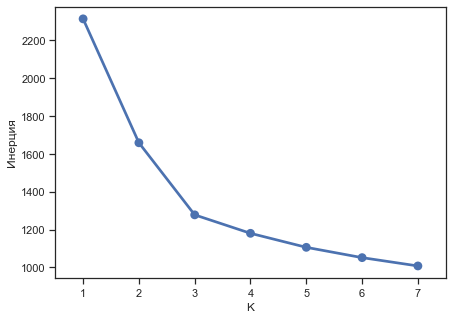

In [27]:
# График инерции для датасета D1
plot_inertia(d1_scaled, KMeans)

In [28]:
# Занесение результатов в соответствующие списки
method_list.append('K-Means')
d1_scores_list.append(adjusted_rand_score(class_labels, k_means_clusters[0]))
d2_scores_list.append(adjusted_rand_score(class_labels, k_means_clusters[1]))
d3_scores_list.append(adjusted_rand_score(class_labels, k_means_clusters[2]))


#### Mini-Batch K-Means


In [29]:
%%time
# Применение метода
mb_k_means = MiniBatchKMeans(n_clusters=3, random_state=4)
mb_k_means_clusters, mb_k_means_centers = do_clustering_with_centers(dataset_list, mb_k_means)

CPU times: total: 15.6 ms
Wall time: 15.6 ms


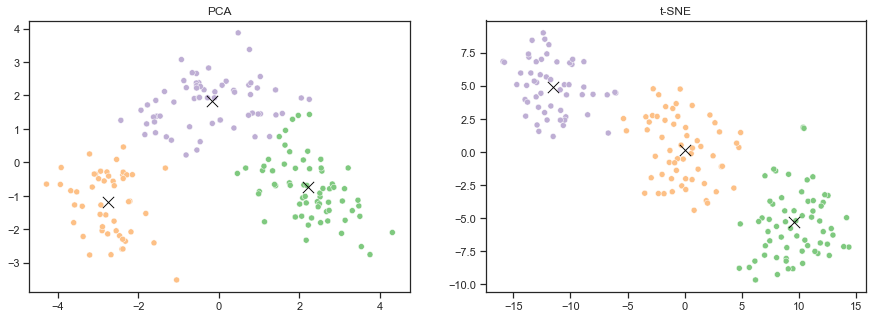

In [30]:
# Визуализация кластеров
plot_clusters_with_centers(mb_k_means_clusters[1:], mb_k_means_centers[1:])

In [31]:
# Оценка метода
cluster_metrics(dataset_list, mb_k_means_clusters, class_labels)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,D1,0.880400,0.859473,0.863915,0.857997,0.860946,0.284421
1,D2,0.861797,0.855978,0.859283,0.855703,0.857489,0.559965
2,D3,0.802459,0.793332,0.799049,0.791971,0.795494,0.614013


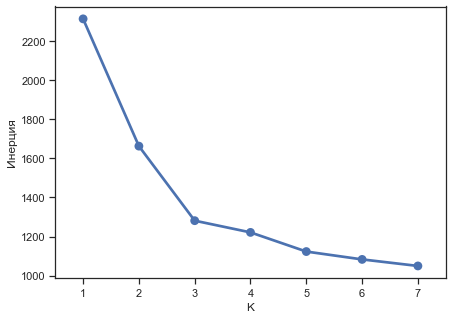

In [32]:
# График инерции для датасета D1
plot_inertia(d1_scaled, MiniBatchKMeans)

In [33]:
# Занесение результатов в соответствующие списки
method_list.append('Mini-Batch K-Means')
d1_scores_list.append(adjusted_rand_score(class_labels, mb_k_means_clusters[0]))
d2_scores_list.append(adjusted_rand_score(class_labels, mb_k_means_clusters[1]))
d3_scores_list.append(adjusted_rand_score(class_labels, mb_k_means_clusters[2]))


#### [Bisecting K-Means](https://scikit-learn.org/stable/modules/clustering.html#bisect-k-means)


In [34]:
%%time
# Применение метода
bis_k_means = BisectingKMeans(n_clusters=3, random_state=4)
bis_k_means_clusters, bis_k_means_centers = do_clustering_with_centers(dataset_list, bis_k_means)

CPU times: total: 0 ns
Wall time: 0 ns


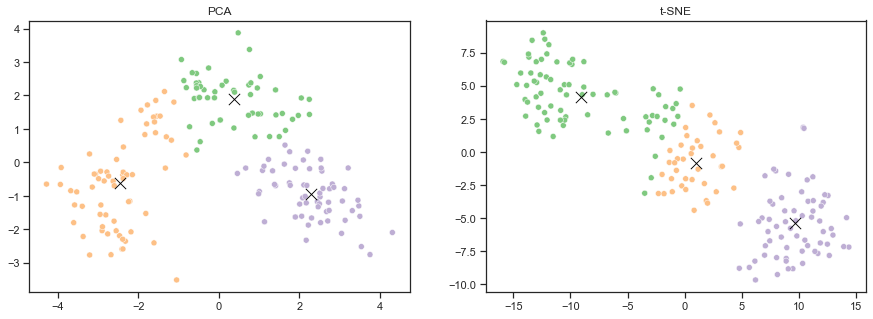

In [35]:
# Визуализация кластеров
plot_clusters_with_centers(bis_k_means_clusters[1:], bis_k_means_centers[1:])

In [36]:
# Оценка метода
cluster_metrics(dataset_list, bis_k_means_clusters, class_labels)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,D1,0.564452,0.654461,0.647653,0.669014,0.658160,0.227419
1,D2,0.690919,0.713596,0.719337,0.713874,0.716595,0.518191
2,D3,0.577423,0.650839,0.648332,0.660887,0.654549,0.489462


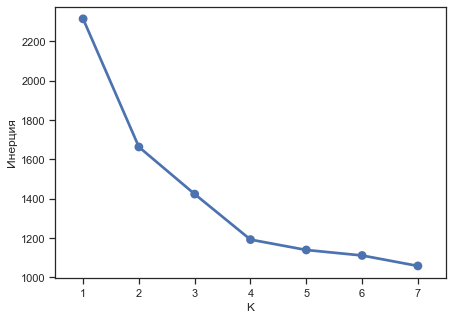

In [37]:
# График инерции для датасета D1
plot_inertia(d1_scaled, BisectingKMeans)

In [38]:
# Занесение результатов в соответствующие списки
method_list.append('Bisecting K-Means')
d1_scores_list.append(adjusted_rand_score(class_labels, bis_k_means_clusters[0]))
d2_scores_list.append(adjusted_rand_score(class_labels, bis_k_means_clusters[1]))
d3_scores_list.append(adjusted_rand_score(class_labels, bis_k_means_clusters[2]))


#### Агломеративная кластеризациия


In [39]:
%%time
# Применение метода
aglo = AgglomerativeClustering(n_clusters=3)
aglo_clusters = do_clustering(dataset_list, aglo)

CPU times: total: 0 ns
Wall time: 0 ns


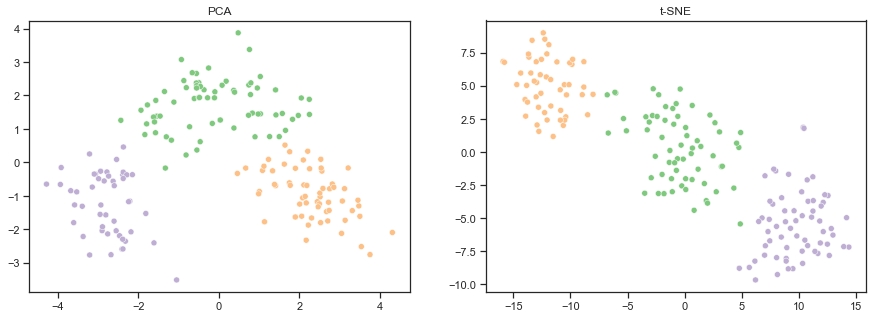

In [40]:
# Визуализация кластеров
plot_clusters(aglo_clusters[1:])

In [41]:
# Оценка метода
cluster_metrics(dataset_list, aglo_clusters, class_labels)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,D1,0.789933,0.784208,0.790429,0.782541,0.786465,0.277444
1,D2,0.896065,0.856790,0.858979,0.857611,0.858295,0.559088
2,D3,0.879191,0.861881,0.865795,0.860877,0.863329,0.602962


In [42]:
# Занесение результатов в соответствующие списки
method_list.append('Agglomerative Clustering')
d1_scores_list.append(adjusted_rand_score(class_labels, aglo_clusters[0]))
d2_scores_list.append(adjusted_rand_score(class_labels, aglo_clusters[1]))
d3_scores_list.append(adjusted_rand_score(class_labels, aglo_clusters[2]))


#### Affinity Propagation


In [43]:
%%time
# Применение метода
aff_pro = AffinityPropagation(random_state=4)
aff_pro_clusters = do_clustering(dataset_list, aff_pro)

CPU times: total: 46.9 ms
Wall time: 46.8 ms


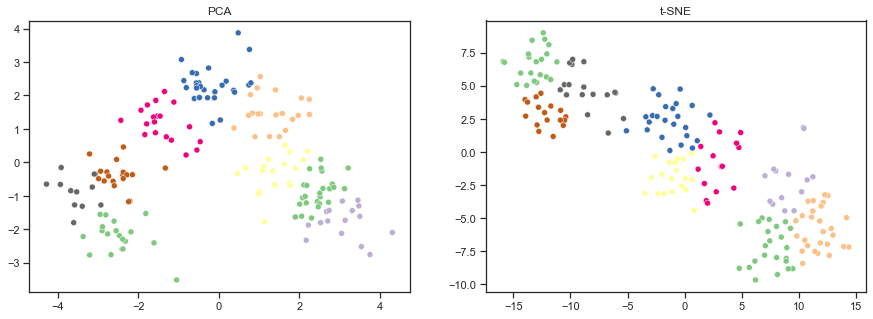

In [44]:
# Визуализация кластеров
plot_clusters(aff_pro_clusters[1:])

In [45]:
# Оценка метода
cluster_metrics(dataset_list, aff_pro_clusters, class_labels)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,D1,0.272859,0.504398,0.868108,0.378443,0.527102,0.120949
1,D2,0.364497,0.590867,0.902457,0.452474,0.602744,0.373584
2,D3,0.331448,0.544887,0.838334,0.418193,0.558023,0.377739


In [46]:
# Занесение результатов в соответствующие списки
method_list.append('Affinity Propagation')
d1_scores_list.append(adjusted_rand_score(class_labels, aff_pro_clusters[0]))
d2_scores_list.append(adjusted_rand_score(class_labels, aff_pro_clusters[1]))
d3_scores_list.append(adjusted_rand_score(class_labels, aff_pro_clusters[2]))


#### Mean shift


In [47]:
%%time
# Применение метода
ms = MeanShift()
ms_clusters, ms_centers = do_clustering_with_centers(dataset_list, ms)

CPU times: total: 1.22 s
Wall time: 1.21 s


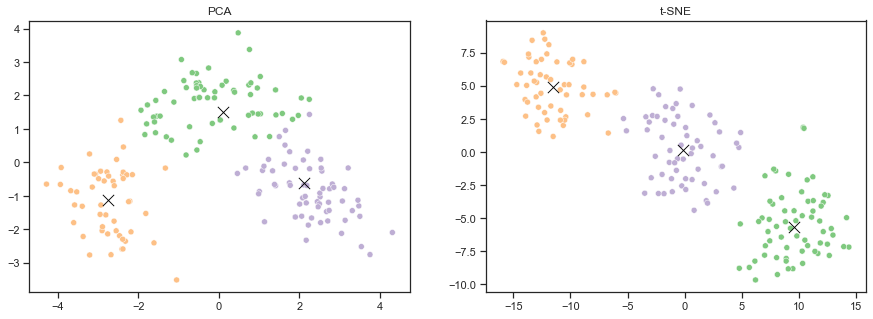

In [48]:
# Визуализация кластеров
plot_clusters_with_centers(ms_clusters[1:], ms_centers[1:])

In [49]:
# Оценка метода
cluster_metrics(dataset_list, ms_clusters, class_labels)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,D1,-0.006424,0.023679,0.019378,0.195749,0.035264,0.224476
1,D2,0.879191,0.861881,0.865795,0.860877,0.863329,0.559163
2,D3,0.802459,0.793332,0.799049,0.791971,0.795494,0.614013


In [50]:
# Занесение результатов в соответствующие списки
method_list.append('Mean shift')
d1_scores_list.append(adjusted_rand_score(class_labels, ms_clusters[0]))
d2_scores_list.append(adjusted_rand_score(class_labels, ms_clusters[1]))
d3_scores_list.append(adjusted_rand_score(class_labels, ms_clusters[2]))


#### Spectral clustering


In [51]:
%%time
# Применение метода
spectral = SpectralClustering(n_clusters=3, random_state=4)
spectral_clusters = do_clustering(dataset_list, spectral)

CPU times: total: 46.9 ms
Wall time: 62.5 ms


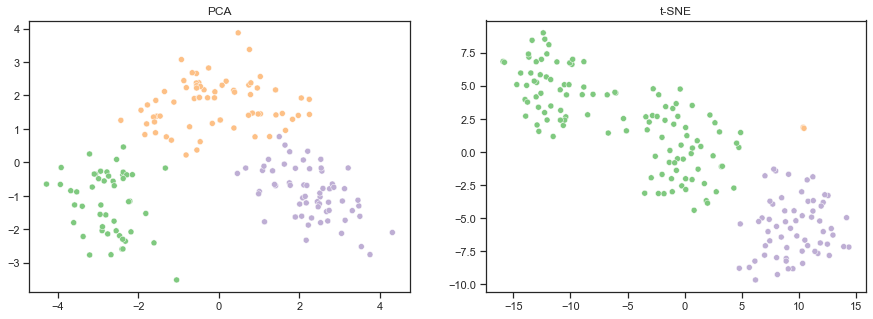

In [52]:
# Визуализация кластеров
plot_clusters(spectral_clusters[1:])

In [53]:
# Оценка метода
cluster_metrics(dataset_list, spectral_clusters, class_labels)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,D1,0.444569,0.566164,0.468895,0.734760,0.572465,0.248553
1,D2,0.929490,0.909908,0.912612,0.909101,0.910853,0.561538
2,D3,0.537333,0.641875,0.539333,0.808322,0.646983,0.418316


In [54]:
# Занесение результатов в соответствующие списки
method_list.append('Spectral clustering')
d1_scores_list.append(adjusted_rand_score(class_labels, spectral_clusters[0]))
d2_scores_list.append(adjusted_rand_score(class_labels, spectral_clusters[1]))
d3_scores_list.append(adjusted_rand_score(class_labels, spectral_clusters[2]))


#### Алгоритм DBSCAN


In [55]:
%%time
# Применение метода
dbscan = DBSCAN(eps=0.8)
dbscan_clusters = do_clustering(dataset_list, dbscan)

CPU times: total: 0 ns
Wall time: 0 ns


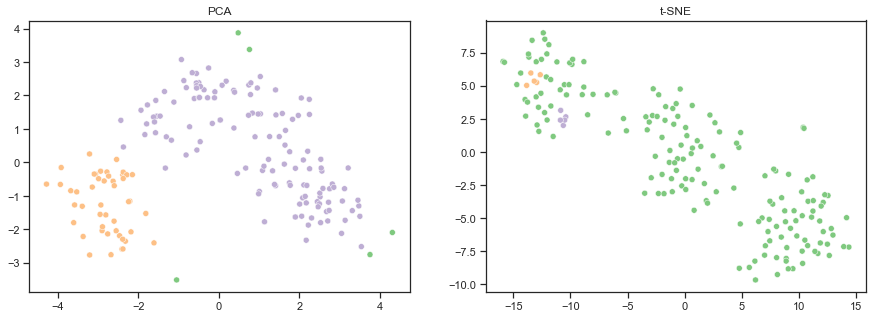

In [56]:
# Визуализация кластеров
plot_clusters(dbscan_clusters[1:])

In [57]:
# Оценка метода
cluster_metrics(dataset_list, dbscan_clusters, class_labels)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,D1,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
1,D2,0.438435,0.542219,0.448892,0.705617,0.548711,0.377809
2,D3,0.034675,0.098274,0.072121,0.306845,0.116792,0.041151


In [58]:
# Занесение результатов в соответствующие списки
method_list.append('DBSCAN')
d1_scores_list.append(adjusted_rand_score(class_labels, dbscan_clusters[0]))
d2_scores_list.append(adjusted_rand_score(class_labels, dbscan_clusters[1]))
d3_scores_list.append(adjusted_rand_score(class_labels, dbscan_clusters[2]))


#### Gaussian mixture


In [59]:
%%time
# Применение метода
gauss = GaussianMixture(n_components=3, random_state=4)
gauss_clusters = do_clustering(dataset_list, gauss)

CPU times: total: 0 ns
Wall time: 0 ns


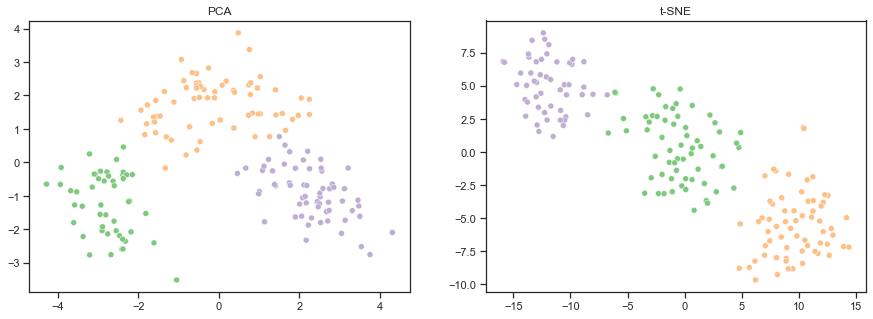

In [60]:
# Визуализация кластеров
plot_clusters(gauss_clusters[1:])

In [61]:
# Оценка метода
cluster_metrics(dataset_list, gauss_clusters, class_labels)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,D1,0.880400,0.859473,0.863915,0.857997,0.860946,0.284421
1,D2,0.913501,0.883583,0.885758,0.883856,0.884806,0.559112
2,D3,0.847097,0.832908,0.837470,0.831867,0.834659,0.610497


In [62]:
# Занесение результатов в соответствующие списки
method_list.append('Gaussian mixture')
d1_scores_list.append(adjusted_rand_score(class_labels, gauss_clusters[0]))
d2_scores_list.append(adjusted_rand_score(class_labels, gauss_clusters[1]))
d3_scores_list.append(adjusted_rand_score(class_labels, gauss_clusters[2]))


### Оценка качества методов кластеризации


In [63]:
def plot_metrics(methods_list, metrics_list, dataset_name):
    """
    Функция визуализации метрик

    :param methods_list: Список методов
    :param metrics_list: Список метрик
    :param dataset_name: Название датасета
    """

    with sns.axes_style('ticks'):
        plt.figure(figsize=(12,6))
        bar_plot = sns.barplot(x=metrics_list, y=methods_list)
        bar_plot.bar_label(bar_plot.containers[-1],label_type='center', fmt='%.3f')
        plt.title(dataset_name)
        plt.xlim(-1, 1)
        plt.show()

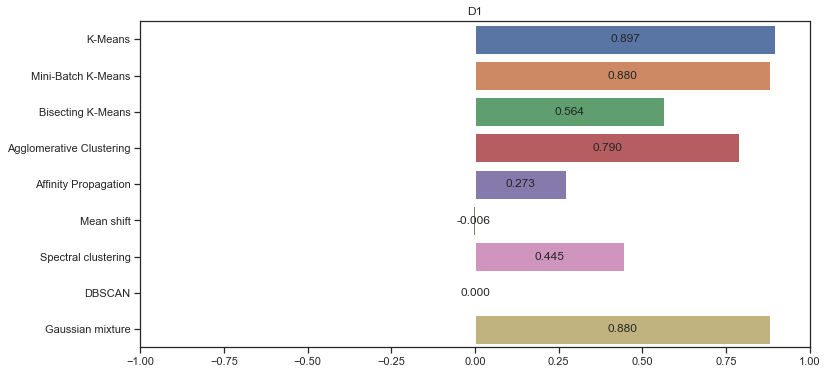

In [64]:
# Оценка качества кластеризации для датасета D1
plot_metrics(method_list, d1_scores_list, 'D1')

Для датасета D1 лучшим методом оказался метод K-средних.

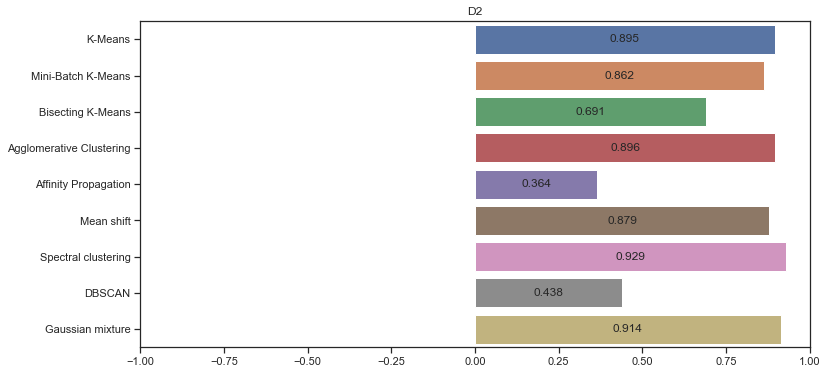

In [65]:
# Оценка качества кластеризации для датасета D2
plot_metrics(method_list, d2_scores_list, 'D2')

Для датасета D2 лучшим методом оказался метод Spectral clustering.

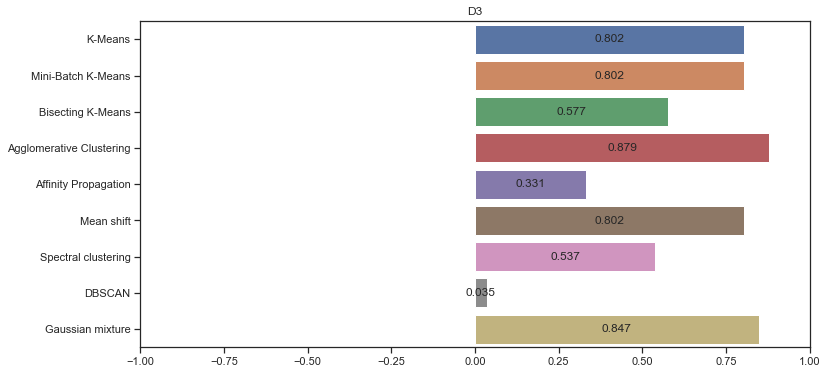

In [66]:
# Оценка качества кластеризации для датасета D2
plot_metrics(method_list, d3_scores_list, 'D3')

Для датасета D3 лучшим методом оказалась агломеративная кластеризация.